In [1]:
from sklearn.cluster import KMeans
import numpy as np

# 假设我们有一个高维数据集
data = np.random.rand(50000, 512) # 此处数据随机生成，你可以替换为自己的数据

# 定义KMeans模型
# n_clusters定义了要分成多少个簇（这个需要你自己设定）
# random_state定义了随机数生成的种子（为了保证结果可复现）
kmeans = KMeans(n_clusters=30, random_state=0)

# 对数据进行聚类
kmeans.fit(data)

# 输出每个样本的簇标签
labels = kmeans.labels_
print(labels)

# 输出簇中心
centers = kmeans.cluster_centers_
print(centers)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


[25 11 27 ... 14 17 17]
[[0.52265666 0.54070579 0.49151606 ... 0.52192722 0.49609579 0.51180682]
 [0.49202822 0.50432846 0.49161265 ... 0.53468101 0.49360428 0.49305221]
 [0.4896115  0.44510811 0.52458095 ... 0.50504414 0.53611651 0.48109124]
 ...
 [0.50299913 0.55934142 0.45442786 ... 0.52087842 0.49563423 0.48418014]
 [0.46604969 0.50969655 0.48383548 ... 0.4739605  0.51308867 0.50062278]
 [0.48844878 0.55426923 0.51125344 ... 0.50739167 0.53884161 0.49849349]]


In [1]:
########################################################################################################################
#                                                          IMPORT                                                      #
########################################################################################################################
import torch
import sys
import os
import json
import numpy as np
sys.path.append('..')

from singleVis.SingleVisualizationModel import VisModel

from singleVis.data import NormalDataProvider

from singleVis.projector import DVIProjector
from singleVis.eval.evaluator import Evaluator

VIS_METHOD = "DVI" # DeepVisualInsight

########################################################################################################################
#                                                     LOAD PARAMETERS                                                  #
########################################################################################################################
CONTENT_PATH = "/home/yifan/0ExpMinist/Default/01"

sys.path.append(CONTENT_PATH)
with open(os.path.join(CONTENT_PATH, "config.json"), "r") as f:
    config = json.load(f)
config = config[VIS_METHOD]

# record output information
# now = time.strftime("%Y-%m-%d-%H_%M_%S", time.localtime(time.time())) 
# sys.stdout = open(os.path.join(CONTENT_PATH, now+".txt"), "w")

SETTING = config["SETTING"]
CLASSES = config["CLASSES"]
DATASET = config["DATASET"]
PREPROCESS = config["VISUALIZATION"]["PREPROCESS"]
GPU_ID = config["GPU"]
EPOCH_START = config["EPOCH_START"]
EPOCH_END = config["EPOCH_END"]
EPOCH_PERIOD = config["EPOCH_PERIOD"]

# Training parameter (subject model)
TRAINING_PARAMETER = config["TRAINING"]
NET = TRAINING_PARAMETER["NET"]
LEN = TRAINING_PARAMETER["train_num"]

# Training parameter (visualization model)
VISUALIZATION_PARAMETER = config["VISUALIZATION"]
LAMBDA1 = VISUALIZATION_PARAMETER["LAMBDA1"]
LAMBDA2 = VISUALIZATION_PARAMETER["LAMBDA2"]
B_N_EPOCHS = VISUALIZATION_PARAMETER["BOUNDARY"]["B_N_EPOCHS"]
L_BOUND = VISUALIZATION_PARAMETER["BOUNDARY"]["L_BOUND"]
ENCODER_DIMS = VISUALIZATION_PARAMETER["ENCODER_DIMS"]
DECODER_DIMS = VISUALIZATION_PARAMETER["DECODER_DIMS"]
S_N_EPOCHS = VISUALIZATION_PARAMETER["S_N_EPOCHS"]
N_NEIGHBORS = VISUALIZATION_PARAMETER["N_NEIGHBORS"]
PATIENT = VISUALIZATION_PARAMETER["PATIENT"]
MAX_EPOCH = VISUALIZATION_PARAMETER["MAX_EPOCH"]

VIS_MODEL_NAME = VISUALIZATION_PARAMETER["VIS_MODEL_NAME"]
EVALUATION_NAME = VISUALIZATION_PARAMETER["EVALUATION_NAME"]



# VIS_MODEL_NAME = 'dvi_grid'

# Define hyperparameters
DEVICE = torch.device("cuda:{}".format(GPU_ID) if torch.cuda.is_available() else "cpu")

import Model.model as subject_model
net = eval("subject_model.{}()".format(NET))

# Define data_provider
data_provider = NormalDataProvider(CONTENT_PATH, net, EPOCH_START, EPOCH_END, EPOCH_PERIOD, device=DEVICE, epoch_name='Epoch',classes=CLASSES,verbose=1)


# Define visualization models
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

# Define Projector
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name=VIS_MODEL_NAME, device=DEVICE)    

########################################################################################################################
#                                                      VISUALIZATION                                                   #
########################################################################################################################

from singleVis.visualizer import visualizer

vis = visualizer(data_provider, projector, 200, "tab10")
save_dir = os.path.join(data_provider.content_path, "imgptDVI")
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-14 03:29:36.383080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 03:29:36.983457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-14 03:29:36.983502: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

Finish initialization...


In [2]:

labelsnew = np.load('labels.npy')

In [22]:
indices = np.where(labelsnew == 12)[0]

In [23]:
indices

array([  100,   182,   266,   376,   514,   625,   748,   845,   916,
        1032,  1111,  1210,  1222,  1263,  1276,  1324,  1356,  1402,
        1514,  2172,  2266,  2368,  2412,  2571,  2622,  2948,  3062,
        3118,  3126,  3205,  3266,  3275,  3635,  3682,  3685,  3907,
        3988,  4017,  4167,  4184,  4290,  4450,  4475,  4529,  4600,
        4666,  5109,  5177,  5210,  5292,  5598,  5668,  5688,  5752,
        5771,  5828,  5866,  5873,  5904,  5947,  6188,  6399,  6735,
        6848,  6849,  6929,  6980,  7238,  7276,  7311,  7374,  7498,
        7592,  7639,  7833,  7840,  7884,  7962,  8062,  8104,  8260,
        8435,  8459,  8479,  8639,  8728,  8731,  8876,  9232,  9236,
        9330,  9344,  9376,  9770, 10062, 10092, 10146, 10211, 10227,
       10255, 10258, 10434, 10441, 10492, 10665, 10740, 10764, 10804,
       10831, 10884, 10894, 10995, 11265, 11396, 11410, 11477, 11572,
       11596, 11696, 11776, 11785, 11802, 11889, 12021, 12157, 12232,
       12381, 12470,

In [25]:
from trustVis.sampeling import Sampleing

epoch=20
print("sampelling starts")
sampleing = Sampleing(data_provider,net,epoch,DEVICE)

sampelling starts


In [ ]:
indicates = sampleing.sample_data(data_provider.train_representation(epoch))

In [27]:
indicates

array([19026, 32188, 26816, ..., 16092, 49890, 40144])

In [32]:
np.save(os.path.join(CONTENT_PATH, "Model", "Epoch_{}".format(epoch), "sampel.npy"),indicates )

In [31]:
len(indicates)

11995

Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 60/60 [00:00<00:00, 14230.84it/s]


Successfully load the DVI visualization model for iteration 20


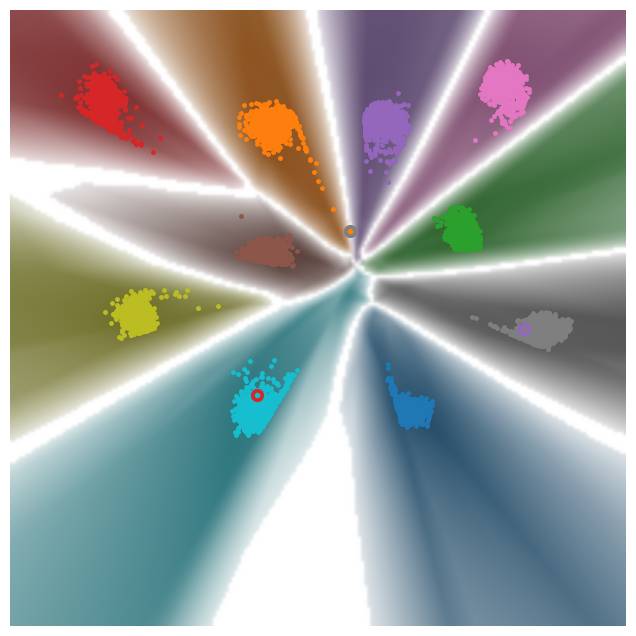

In [29]:
from trustVis.visualizer2 import visualizer
epoch = 20
vis = visualizer(data_provider, projector, 200,[indicates],'tab10')
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'test')))

Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 7937.84it/s]


Successfully load the DVI visualization model for iteration 20


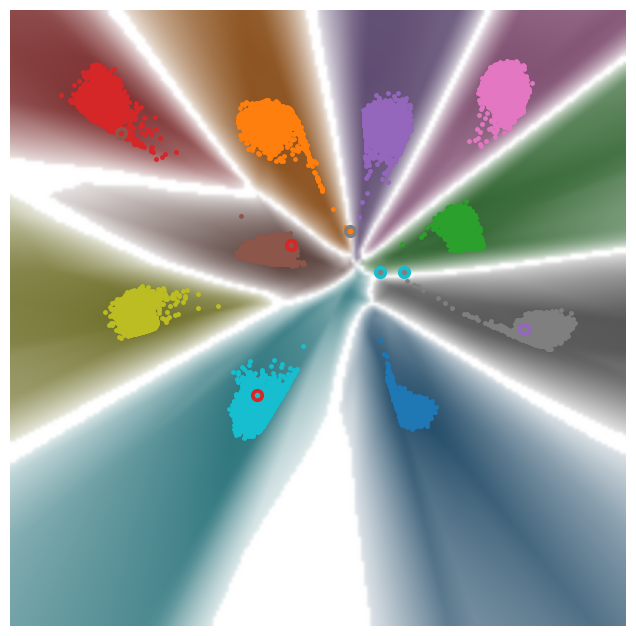

In [30]:
from trustVis.visualizer2 import visualizer
epoch = 20
vis = visualizer(data_provider, projector, 200,[],'tab10')
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'test')))